In [554]:
### please check out the Final Code section.

## Import Libraries

In [614]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import timedelta,datetime
import yfinance as yf
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error

from datetime import datetime, timedelta
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from keras import layers,Sequential
from keras.layers import SimpleRNN,LSTM,Dense,Dropout,Bidirectional

### Exploratory Data Analysis

In [3]:
data_url='https://raw.githubusercontent.com/Kamalesh1512/datasets/main/VOLTAS.NS.csv'

def read_data(url):
    df=pd.read_csv(url,index_col='Date')
    print("shape of the dataset",df.shape)
    return df

In [4]:
df=read_data(data_url)

shape of the dataset (2468, 6)


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-10,118.099998,124.699997,114.800003,123.699997,114.717346,6406819.0
2013-12-11,123.000000,123.699997,114.400002,117.550003,109.013939,6545655.0
2013-12-12,117.000000,119.199997,114.050003,117.250000,108.735733,5385410.0
2013-12-13,115.949997,116.699997,112.599998,113.500000,105.258041,3445000.0
2013-12-16,113.400002,115.750000,112.849998,114.650002,106.324524,1992818.0


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-04,844.000000,848.450012,830.549988,837.849976,837.849976,995617.0
2023-12-05,841.900024,846.950012,825.400024,832.500000,832.500000,1388896.0
2023-12-06,839.000000,849.900024,833.700012,845.049988,845.049988,1717573.0
2023-12-07,845.549988,869.950012,833.099976,866.049988,866.049988,2356938.0
2023-12-08,872.000000,878.599976,844.849976,855.450012,855.450012,2817604.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2468 entries, 2013-12-10 to 2023-12-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2466 non-null   float64
 1   High       2466 non-null   float64
 2   Low        2466 non-null   float64
 3   Close      2466 non-null   float64
 4   Adj Close  2466 non-null   float64
 5   Volume     2466 non-null   float64
dtypes: float64(6)
memory usage: 135.0+ KB


In [8]:
## checking for missing vaules
df.isna().sum()

Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [9]:
## checking for duplicate record
df.duplicated().sum()

1

In [10]:
def handle_duplicates(dataset):
    if dataset.duplicated().sum()>0:
        dataset.drop_duplicates(inplace=True)
    return dataset

In [11]:
df=handle_duplicates(df)

## rechecking 
df.duplicated().sum()

0

<Axes: >

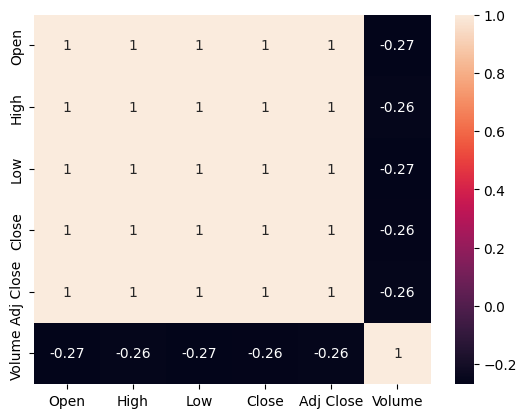

In [14]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)

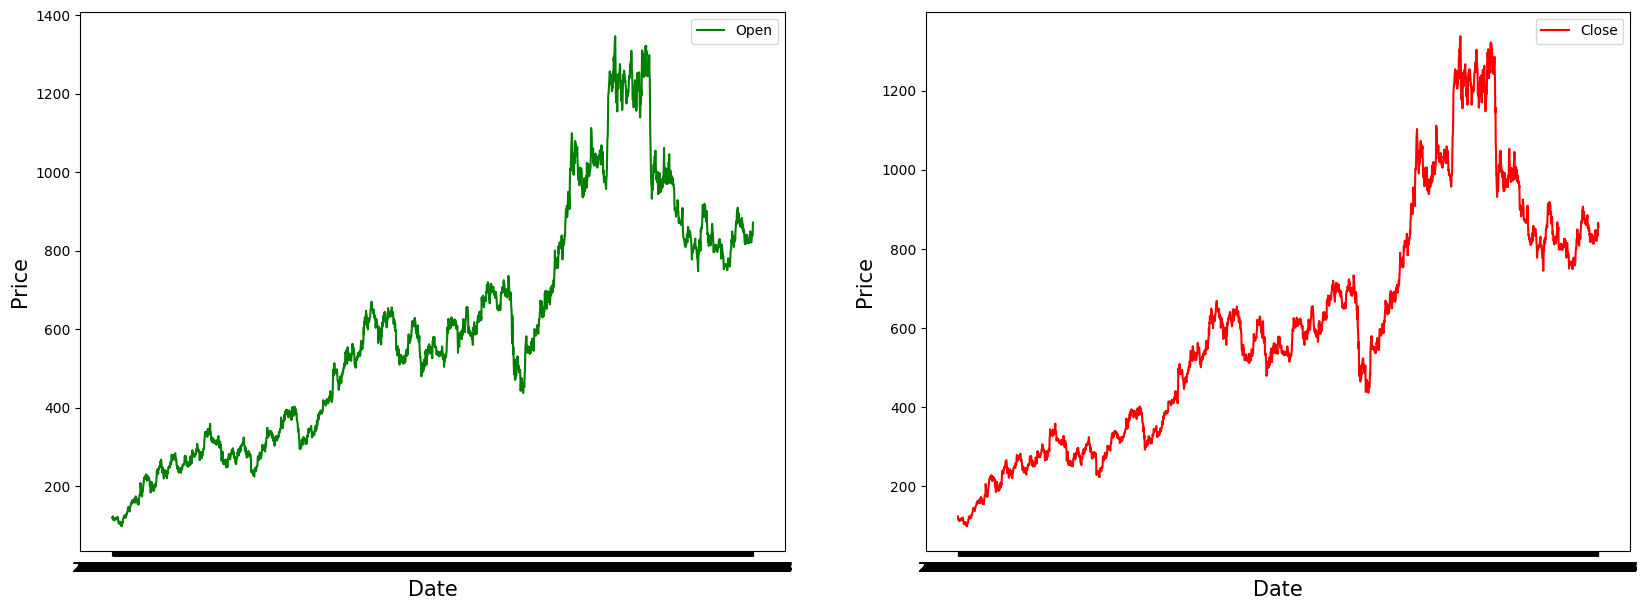

In [15]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

<div class="alert alert-block alert-warning" style="border: 3px solid #f0ad4e; background-color: #fcf8e3; padding: 10px;">
<p>
    <font color = black><b>Observations :</b></font>
</p>
<font color = black>
1.The heatmap plot provides a visual representation of the correlation between different features in the dataset.There is a strong correlation between the features [Open,Close,high,Low,Adj Close]because all the representing the Stock Price for the Day/Date.

2.There is no missing values or duplicate records in the dataset.
</font>
</div>

<div class="alert alert-block alert-success" style="border: 3px solid #f0ad4e; background-color: #	#355E3B; padding: 10px;">
<font color = black><b>Feature Selection:</b></font>
<font color = black>
    I'm Going to make use of only <b>"Open"</b> and <b>"Close"</b> columns because im trying to predict the opening price of the next day of market(whether the price is up or down)
</font>
</div>

In [16]:
# Feature/columns Selection
data=df[['Open','Close']]
data.head()

,Open,Close
Date,,
2013-12-10,118.099998,123.699997
2013-12-11,123.000000,117.550003
2013-12-12,117.000000,117.250000
2013-12-13,115.949997,113.500000
2013-12-16,113.400002,114.650002


In [583]:
scaler=MinMaxScaler()


AttributeError: 'NoneType' object has no attribute 'shape'

In [19]:
scaled_data=data.copy()
scaled_data[data.columns]=scaler.fit_transform(data)

In [20]:
scaled_data

,Open,Close
Date,,
2013-12-10,0.016250,0.019861
2013-12-11,0.020173,0.014896
2013-12-12,0.015370,0.014654
2013-12-13,0.014529,0.011626
2013-12-16,0.012488,0.012555
...,...,...
2023-12-04,0.597342,0.596440
2023-12-05,0.595661,0.592120
2023-12-06,0.593340,0.602253


In [21]:
scaled_data.shape

(2466, 2)

### Splitting the Dataset 

In [22]:
## splitting the dataset into 70% , 15% and 15%
training_size=int(len(scaled_data)*0.70)
test_size=int(len(scaled_data.iloc[training_size:])*0.50)+training_size

train_data,test_data,val_data=scaled_data.iloc[:training_size,:],scaled_data.iloc[training_size:test_size,:],scaled_data.iloc[test_size:,:]
print("Length of Training data",train_data.shape)
print("Length of Testing data",test_data.shape)
print("Length of Validation data",val_data.shape)

Length of Training data (1726, 2)
Length of Testing data (370, 2)
Length of Validation data (370, 2)


In [23]:
#creating the sequence of features and labels for training the model
def create_data(dataset,n=1):
    features=[]
    targets=[]
    start_idx=0
    for stop_idx in range(n,len(dataset)):
        features.append(dataset.iloc[start_idx:stop_idx])
        targets.append(dataset.iloc[stop_idx])
        start_idx +=1
    return (np.array(features),np.array(targets))
    

In [24]:
X_train,y_train=create_data(train_data,50)
X_test,y_test=create_data(test_data,50)
X_val,y_val=create_data(val_data,50)

In [25]:
print("Shape of X_train and y_train",X_train.shape,y_train.shape)
print("Shape of X_test and y_test",X_test.shape,y_test.shape)
print("shape of X_val and y_val",X_val.shape,y_val.shape)

Shape of X_train and y_train (1676, 50, 2) (1676, 2)
Shape of X_test and y_test (320, 50, 2) (320, 2)
shape of X_val and y_val (320, 50, 2) (320, 2)


## Model Training

### LSTM

In [26]:
# lstm=Sequential()
# lstm.add(LSTM(units=50,return_sequences=True,activation='relu',
#               input_shape=(X_train.shape[1],X_train.shape[-1])))
# lstm.add(Dropout(0.2))
# lstm.add(LSTM(units=50))
# lstm.add(Dense(units=2))
# lstm.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])
# lstm.summary()

In [27]:
# lstm.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_val,y_val),verbose=2)

## LSTM - Bidirectional

In [545]:
# # Building the model
# lstm_b = Sequential()

# # Adding a Bidirectional LSTM layer
# lstm_b.add(Bidirectional(LSTM(64, return_sequences=True, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])))
# lstm_b.add(Dropout(0.2))

# # Adding another Bidirectional LSTM layer
# lstm_b.add(Bidirectional(LSTM(64, activation='relu')))
# lstm_b.add(Dropout(0.2))

# # Adding a Dense layer with appropriate activation for classification
# lstm_b.add(Dense(32, activation='relu'))
# lstm_b.add(Dropout(0.2))

# # Output layer with appropriate activation
# lstm_b.add(Dense(2))
# # Compile the model
# lstm_b.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
#                loss='mean_absolute_error', metrics=['mean_absolute_error'])

In [544]:
# # Print the summary to check the architecture
# lstm_b.summary()

In [543]:
# history=lstm_b.fit(X_train,y_train,epochs=75,batch_size=16,validation_data=(X_val,y_val),verbose=2)

## Model Evaluation
<div class="alert alert-block alert-warning" style="border: 3px solid #f0ad4e; background-color: #fcf8e3; padding: 10px;">
<p>
    <font color = black><b>Evaluation Metrics</b></font>
</p>
<font color = black>
1.We can calculate the Percentage Accuracy for our regression model using the formula.

2.Percentage Accuracy = $(100 \times (1 - \frac{\text{MAE}}{\text{Mean of the Actual Values}})$
</font>
</div>

In [546]:
# def model_evaluate(model_type,X_train,X_test,y_train,y_test,metrics=mean_absolute_error):
#     if model_type=='lstm':
#         train_y_pred=lstm.predict(X_train)
#         test_y_pred=lstm.predict(X_test)
#     elif model_type=='lstm_b':
#         train_y_pred=lstm_b.predict(X_train)
#         test_y_pred=lstm_b.predict(X_test)
#     elif model_type=='best_model':
#         train_y_pred=best_model.predict(X_train)
#         test_y_pred=best_model.predict(X_test)
#     else:
#         raise ValueError("Invalid model type. Please choose 'lstm', 'lstm_b', or 'best_model'.")
    
#     train_loss=metrics(y_train,train_y_pred)
#     test_loss=metrics(y_test,test_y_pred)
    
#     print("Accuracy of Training Data",100*(1-(train_loss/np.mean(y_train))))
#     print("Accuarcy of Testing Data",100*(1-(test_loss/np.mean(y_test))))

In [78]:
# model_evaluate(model_type='lstm_b',metrics=mean_absolute_error,
#                X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

10/10 [==============================] - 0s 20ms/step
Accuracy of Training Data 95.63691573746955
Accuarcy of Testing Data 92.22894082646846


In [547]:
# def plot_error_graph(history):
#     err= history.history['mean_squared_error']
#     val_err = history.history['val_mean_squared_error']
    
#     loss = history.history['loss']
#     val_loss = history.history['val_loss']
    
#     epochs_range = range(100)
    
#     plt.figure(figsize=(15,6))
#     plt.subplot(1, 2, 1)
#     plt.plot(epochs_range, err, label='Training mean_absolute_error')
#     plt.plot(epochs_range, val_err, label='Validation mean_absolute_error')
#     plt.legend(loc='lower right')
#     plt.title('Training and Validation mean_absolute_error')
    
#     plt.subplot(1, 2, 2)
#     plt.plot(epochs_range, loss, label='Training Loss')
#     plt.plot(epochs_range, val_loss, label='Validation Loss')
#     plt.legend(loc='upper right')
#     plt.title('Training and Validation Loss')
#     plt.show()
# # plot_error_graph(history)

<div class="alert alert-block alert-warning" style="border: 3px solid #f0ad4e; background-color: #fcf8e3; padding: 10px;">
<font color = black><b>Observations:</b></font>
<font color = black>
    Comparing the Performance of each model based on <b>mean_absolute_error</b> Bidirectional_LSTM has given results better performance than LSTM. 
</font>
</div>

## Model Tunning

In [62]:
# # Define the model-building function for Keras Tuner
# def build_model(hp):
#     model = keras.Sequential()

#     # Adding a Bidirectional LSTM layer with return_sequences=True for stacking multiple layers
#     model.add(layers.Bidirectional(
#         layers.LSTM(
#             units=hp.Int('units_1', min_value=32, max_value=128, step=32),
#             activation='relu',
#             return_sequences=True),
#         input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(layers.Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

#     # Adding another Bidirectional LSTM layer
#     model.add(layers.Bidirectional(
#         layers.LSTM(
#             units=hp.Int('units_2', min_value=32, max_value=128, step=32),
#             activation='relu')),
#     )
#     model.add(layers.Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

#     # Adding a Dense output layer with linear activation for regression
#     model.add(layers.Dense(2, activation='linear'))

#     # Compile the model
#     model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
#                   loss='mean_absolute_error',metrics=['mean_absolute_error'])

#     return model

# # Instantiate the tuner and perform random search
# tuner = RandomSearch(
#     build_model,
#     objective='val_loss',
#     max_trials=5, 
#     executions_per_trial=1,)

# stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# # Search for the best hyperparameters
# tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val),callbacks=[stop_early])

# # # Get the best model
# best_model = tuner.get_best_models(num_models=1)[0]


Reloading Tuner from .\untitled_project\tuner0.json


In [ ]:
# best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
# best_hps.get('units')

In [548]:
# # Summary of the best model
# best_model.summary()

In [549]:
# history=best_model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_val,y_val),verbose=2)

In [550]:
# best_model.evaluate(X_train,y_train)

In [551]:
# model_evaluate(model_type='best_model',
#                metrics=mean_absolute_error,
#                X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [552]:
# y_pred=best_model.predict(X_test)
# r2_score(y_test,y_pred)

In [ ]:
# result=pd.concat([data.iloc[-444:][['Open',"Close"]],pd.DataFrame(lstm_prediction,columns=['Open_predicted','Close_predicted'],
#                                                 index=data.iloc[-444:].index)], axis=1)
# result.head(5)

In [ ]:
# result.tail()

In [ ]:
# result[['Close','Close_predicted']].plot(figsize=(10,6))
# plt.xticks(rotation=45)
# plt.xlabel('Date',size=15)
# plt.ylabel('Stock Price',size=15)
# plt.title('Actual vs Predicted for Close Price',size=15)
# plt.show()

In [ ]:
# result[['Open','Open_predicted']].plot(figsize=(10,6))
# plt.xticks(rotation=45)
# plt.xlabel('Date',size=15)
# plt.ylabel('Stock Price',size=15)
# plt.title('Actual vs Predicted for open price',size=15)
# plt.show()

## Final code

In [515]:
class Pipeline:
    def __init__(self, data_url):
        self.data_url = data_url

    ## Reading data
    def read_data(self):
        self.data = pd.read_csv(self.data_url)
        self.data['Date']=pd.to_datetime(self.data['Date'])
        self.data.set_index('Date',inplace=True)
        print("shape of the dataset", self.data.shape)
        return self.data
    ## Handling missing values
    def handle_missing_data(self):
        if (self.data.isna().sum().any())>0:
            percent=(self.data.isnull().sum()/self.data.shape[0])*100
            if (percent.any()<15) | (percent.any()>75):
                self.data.dropna(inplace=True)
            else:
                self.data.fillna(method='bfill',inplace=True)
        print(self.data.isnull().sum())

    ## remove duplicate records
    def handle_duplicate(self):
        if self.data.duplicated().sum()>0:
            self.data.drop_duplicates(inplace=True)
        print(self.data.duplicated().sum())
    
    ## feature selection
    def feature_selection(self,col_names):
        '''Pass the list of columns in order to select as features'''
        self.features=self.data[col_names]
        
        print("Features selected")
        print(self.features.head())

    def feature_transformation(self,type):
        '''Prints the top 5 scaled data after performing feature transformation'''
        
        if type==MinMaxScaler:
            print("Performing MinMaxScaling")
            self.scaled_data=self.features.copy()
            self.scaler=MinMaxScaler()
            self.scaled_data[self.features.columns]=self.scaler.fit_transform(self.features)
            print(self.scaled_data.head())
        elif type==StandardScaler:
            print("StandardScaling")
            self.scaler=StandardScaler()
            self.scaled_data[self.features.columns]=self.scaler.fit_transform(self.features)
            print(self.scaled_data.head())
        else:
            raise ValueError("Invalid scaling type. Please choose 'MinMaxScaler' or 'StandardScaler'.")
        return self.scaled_data,self.scaler


    def data_split(self,data):
        '''Should be performed after feature scaling.
        Function is used to split the timeseries data
        Returns train,test, validation data splitted in 70% , 15% ,15% '''
        train_size=int(len(data)*0.70)
        test_size=int(len(data.iloc[train_size:])*0.50)+train_size
        
        self.train_data=data.iloc[:train_size,:]
        self.test_data=data.iloc[train_size:test_size,:]
        self.val_data=data.iloc[test_size:,:]
        
        print("Length of Training data",self.train_data.shape)
        print("Length of Testing data",self.test_data.shape)
        print("Length of Validation data",self.val_data.shape)
        
        return self.train_data,self.test_data,self.val_data


    def create_labels(self,dataset,time_steps=1):
        ''' Function returns the features and targets generated out of data
        based on the n_steps values - 'n' rows are labeled as features and n+1 is labeled as target
        '''
        features=[]
        targets=[]
        start_idx=0
        for stop_idx in range(time_steps,len(dataset)):
            features.append(dataset.iloc[start_idx:stop_idx])
            targets.append(dataset.iloc[stop_idx])
            start_idx +=1
        X=np.array(features)
        y=np.array(targets)
        print(f"Shape of dataset is features {X.shape} and targets {y.shape}")
        return X,y


    def create_rnn_model(self,model_type,time_steps,features):
        ''' Returns the prepared model. '''
        self.model = Sequential()
        if model_type == 'lstm':
            print("-------------Preparing LSTM Model----------------")
            self.model.add(LSTM(units=50,return_sequences=True,activation='relu',
                           input_shape=(time_steps,features)))
            self.model.add(Dropout(0.2))
            self.model.add(LSTM(units=50))
            
        elif model_type == 'bidirectional_lstm':
            print("-------------Preparing bidirectional_lSTM Model----------------")
            # Adding a Bidirectional LSTM layer
            self.model.add(Bidirectional(LSTM(64, return_sequences=True, activation='relu'), input_shape=(time_steps,features)))
            self.model.add(Dropout(0.2))

            # Adding another Bidirectional LSTM layer
            self.model.add(Bidirectional(LSTM(64, activation='relu')))
            self.model.add(Dropout(0.2))

        else:
            raise ValueError("Invalid model type. Please choose 'lstm', 'bidirectional_lstm'.")

        # Adding a Dense layer with appropriate activation for classification
        self.model.add(Dense(32, activation='relu'))
        self.model.add(Dropout(0.2))
        
        #Output layer
        self.model.add(Dense(features))
    
        #Compile the model
        self.model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
               loss='mean_absolute_error')

        ##creating a instance variable for model_type.
        self.type=model_type
        print(f"========================Summary of {self.type}==========================")
        print(self.model.summary())
        return self.model


    def model_train(self,X,y,epochs,batch,val_data):
        
        print(f"===============Training the {self.type} Model====================")
        self.history=self.model.fit(X,y,epochs=epochs,batch_size=batch,validation_data=val_data,verbose=2)
        return self.history
            

    def model_evaluate(self,X_train,X_test,y_train,y_test,metrics=mean_absolute_error):

        print(f"Evaluating the Performance of {self.type} Model")
        train_y_pred=self.model.predict(X_train)
        test_y_pred=self.model.predict(X_test)
        ## checking for metrics passed
        if metrics==mean_absolute_error:
            print("Metrics used is",metrics)
            train_loss=metrics(y_train,train_y_pred)
            test_loss=metrics(y_test,test_y_pred)
            
            print("Accuracy of Training Data",100*(1-(train_loss/np.mean(y_train))))
            print("Accuarcy of Testing Data",100*(1-(test_loss/np.mean(y_test))))
        
    def save_model(self,stockname,feature_name):

        '''Function accepts strings and filename is designed as per the strings passed and 
        model saved using the same filename format'''
        filename=f"{stockname}_{self.type}_{feature_name}.h5"
        print(f"Saving the {self.type} Model")
        self.model.save(filename)


In [540]:
# Datasets
voltas_data_url = 'https://raw.githubusercontent.com/Kamalesh1512/datasets/main/VOLTAS.NS.csv'
nifty50_data_url='https://raw.githubusercontent.com/Kamalesh1512/datasets/main/Nifty50_NSE.csv'
dmart_data_url='https://raw.githubusercontent.com/Kamalesh1512/datasets/main/DMART.NS.csv'
reliance_data_url='https://raw.githubusercontent.com/Kamalesh1512/datasets/main/RELIANCE.NS.csv'

## Function to Train a Model for a Provided Stock

In [529]:
def build_model(data,features_names,stock_name,model):
    stocks=Pipeline(data)
    # reading dataset
    df=stocks.read_data()
    
    #handling missing data
    stocks.handle_missing_data()
    
    #handling duplicate data
    stocks.handle_duplicate()

    # a list of features are passed - feature selection
    stocks.feature_selection(features_names)
    # Feature transformation using MinMaxScaler.
    scaled_df,scaler=stocks.feature_transformation(type=MinMaxScaler)

    # data split into train,test,val.
    train,test,val=stocks.data_split(data=scaled_df)

    ## create_data sequences - features and targets
    X_train,y_train=stocks.create_labels(dataset=train,time_steps=50)
    X_test,y_test=stocks.create_labels(dataset=test,time_steps=50)
    X_val,y_val=stocks.create_labels(dataset=val,time_steps=50)

    if model=='lstm':
        lstm=stocks.create_rnn_model(model_type=model,time_steps=50,features=len(features_names))
        ### train 
        history=stocks.model_train(X=X_train,y=y_train,epochs=100,batch=32,val_data=(X_val,y_val))
        ## model Evaluate
        stocks.model_evaluate(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
        ## model save
        stocks.save_model(stockname=stock_name,feature_name=features_names[0])
    elif model=='bidirectional_lstm':
        bidirectional=stocks.create_rnn_model(model_type=model,time_steps=50,features=len(features_names))
        ### train 
        history=stocks.model_train(X=X_train,y=y_train,epochs=100,batch=32,val_data=(X_val,y_val))
        ## model Evaluate
        stocks.model_evaluate(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
        ## model save
        stocks.save_model(stockname=stock_name,feature_name=features_names[0])

        

In [530]:
## Building lstm model
build_model(data=voltas_data_url,stock_name='Voltas',features_names=['Open'],model='lstm')


shape of the dataset (2468, 6)
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0
Features selected
                  Open
Date                  
2013-12-10  118.099998
2013-12-11  123.000000
2013-12-12  117.000000
2013-12-13  115.949997
2013-12-16  113.400002
Performing MinMaxScaling
                Open
Date                
2013-12-10  0.016250
2013-12-11  0.020173
2013-12-12  0.015370
2013-12-13  0.014529
2013-12-16  0.012488
Length of Training data (1726, 1)
Length of Testing data (370, 1)
Length of Validation data (370, 1)
Shape of dataset is features (1676, 50, 1) and targets (1676, 1)
Shape of dataset is features (320, 50, 1) and targets (320, 1)
Shape of dataset is features (320, 50, 1) and targets (320, 1)
-------------Preparing LSTM Model----------------
========================Summary of lstm==========================
Model: "sequential_15"
_________________________________________________________________
 Layer (type)   

In [531]:
## Building bidirectional_lstm model
build_model(data=voltas_data_url,stock_name='Voltas',features_names=['Open'],model='bidirectional_lstm')

shape of the dataset (2468, 6)
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0
Features selected
                  Open
Date                  
2013-12-10  118.099998
2013-12-11  123.000000
2013-12-12  117.000000
2013-12-13  115.949997
2013-12-16  113.400002
Performing MinMaxScaling
                Open
Date                
2013-12-10  0.016250
2013-12-11  0.020173
2013-12-12  0.015370
2013-12-13  0.014529
2013-12-16  0.012488
Length of Training data (1726, 1)
Length of Testing data (370, 1)
Length of Validation data (370, 1)
Shape of dataset is features (1676, 50, 1) and targets (1676, 1)
Shape of dataset is features (320, 50, 1) and targets (320, 1)
Shape of dataset is features (320, 50, 1) and targets (320, 1)
-------------Preparing bidirectional_lSTM Model----------------
========================Summary of bidirectional_lstm==========================
Model: "sequential_16"
______________________________________________________

In [533]:
## Building lstm model
build_model(data=voltas_data_url,stock_name='Voltas',features_names=['Close'],model='lstm')

shape of the dataset (2468, 6)
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0
Features selected
                 Close
Date                  
2013-12-10  123.699997
2013-12-11  117.550003
2013-12-12  117.250000
2013-12-13  113.500000
2013-12-16  114.650002
Performing MinMaxScaling
               Close
Date                
2013-12-10  0.019861
2013-12-11  0.014896
2013-12-12  0.014654
2013-12-13  0.011626
2013-12-16  0.012555
Length of Training data (1726, 1)
Length of Testing data (370, 1)
Length of Validation data (370, 1)
Shape of dataset is features (1676, 50, 1) and targets (1676, 1)
Shape of dataset is features (320, 50, 1) and targets (320, 1)
Shape of dataset is features (320, 50, 1) and targets (320, 1)
-------------Preparing LSTM Model----------------
========================Summary of lstm==========================
Model: "sequential_18"
_________________________________________________________________
 Layer (type)   

In [534]:
## Building bidirectional_lstm model
build_model(data=voltas_data_url,stock_name='Voltas',features_names=['Close'],model='bidirectional_lstm')

shape of the dataset (2468, 6)
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0
Features selected
                 Close
Date                  
2013-12-10  123.699997
2013-12-11  117.550003
2013-12-12  117.250000
2013-12-13  113.500000
2013-12-16  114.650002
Performing MinMaxScaling
               Close
Date                
2013-12-10  0.019861
2013-12-11  0.014896
2013-12-12  0.014654
2013-12-13  0.011626
2013-12-16  0.012555
Length of Training data (1726, 1)
Length of Testing data (370, 1)
Length of Validation data (370, 1)
Shape of dataset is features (1676, 50, 1) and targets (1676, 1)
Shape of dataset is features (320, 50, 1) and targets (320, 1)
Shape of dataset is features (320, 50, 1) and targets (320, 1)
-------------Preparing bidirectional_lSTM Model----------------
========================Summary of bidirectional_lstm==========================
Model: "sequential_19"
______________________________________________________

In [535]:
## Building lstm model - open feature
build_model(data=dmart_data_url,stock_name='Dmart',features_names=['Open'],model='lstm')
## Building lstm model - close feature
build_model(data=dmart_data_url,stock_name='Dmart',features_names=['Close'],model='lstm')

shape of the dataset (1661, 6)
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0
Features selected
                  Open
Date                  
2017-03-22  641.549988
2017-03-23  637.900024
2017-03-24  635.450012
2017-03-27  615.000000
2017-03-28  617.200012
Performing MinMaxScaling
                Open
Date                
2017-03-22  0.005327
2017-03-23  0.004595
2017-03-24  0.004103
2017-03-27  0.000000
2017-03-28  0.000441
Length of Training data (1162, 1)
Length of Testing data (249, 1)
Length of Validation data (250, 1)
Shape of dataset is features (1112, 50, 1) and targets (1112, 1)
Shape of dataset is features (199, 50, 1) and targets (199, 1)
Shape of dataset is features (200, 50, 1) and targets (200, 1)
-------------Preparing LSTM Model----------------
========================Summary of lstm==========================
Model: "sequential_20"
_________________________________________________________________
 Layer (type)   

In [536]:
## Building Bidirectional_lstm model - open feature
build_model(data=dmart_data_url,stock_name='Dmart',features_names=['Open'],model='bidirectional_lstm')
## Building Bidirectional_lstm model - close feature
build_model(data=dmart_data_url,stock_name='Dmart',features_names=['Close'],model='bidirectional_lstm')

shape of the dataset (1661, 6)
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0
Features selected
                  Open
Date                  
2017-03-22  641.549988
2017-03-23  637.900024
2017-03-24  635.450012
2017-03-27  615.000000
2017-03-28  617.200012
Performing MinMaxScaling
                Open
Date                
2017-03-22  0.005327
2017-03-23  0.004595
2017-03-24  0.004103
2017-03-27  0.000000
2017-03-28  0.000441
Length of Training data (1162, 1)
Length of Testing data (249, 1)
Length of Validation data (250, 1)
Shape of dataset is features (1112, 50, 1) and targets (1112, 1)
Shape of dataset is features (199, 50, 1) and targets (199, 1)
Shape of dataset is features (200, 50, 1) and targets (200, 1)
-------------Preparing bidirectional_lSTM Model----------------
========================Summary of bidirectional_lstm==========================
Model: "sequential_22"
______________________________________________________

In [538]:
## Building lstm model - open feature
build_model(data=nifty50_data_url,stock_name='Nifyt50',features_names=['Open'],model='lstm')
## Building lstm model - close feature
build_model(data=nifty50_data_url,stock_name='Nifty50',features_names=['Close'],model='lstm')

shape of the dataset (2467, 6)
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0
Features selected
                   Open
Date                   
2013-12-13  6201.299805
2013-12-16  6168.350098
2013-12-17  6178.200195
2013-12-18  6129.950195
2013-12-19  6253.899902
Performing MinMaxScaling
                Open
Date                
2013-12-13  0.016834
2013-12-16  0.014647
2013-12-17  0.015301
2013-12-18  0.012099
2013-12-19  0.020324
Length of Training data (1717, 1)
Length of Testing data (368, 1)
Length of Validation data (368, 1)
Shape of dataset is features (1667, 50, 1) and targets (1667, 1)
Shape of dataset is features (318, 50, 1) and targets (318, 1)
Shape of dataset is features (318, 50, 1) and targets (318, 1)
-------------Preparing LSTM Model----------------
========================Summary of lstm==========================
Model: "sequential_24"
_________________________________________________________________
 Layer (t

In [539]:
## Building Bidirectional_lstm model - open feature
build_model(data=nifty50_data_url,stock_name='Nifyt50',features_names=['Open'],model='bidirectional_lstm')
## Building Bidirectional_lstm model - close feature
build_model(data=nifty50_data_url,stock_name='Nifyt50',features_names=['Close'],model='bidirectional_lstm')

shape of the dataset (2467, 6)
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0
Features selected
                   Open
Date                   
2013-12-13  6201.299805
2013-12-16  6168.350098
2013-12-17  6178.200195
2013-12-18  6129.950195
2013-12-19  6253.899902
Performing MinMaxScaling
                Open
Date                
2013-12-13  0.016834
2013-12-16  0.014647
2013-12-17  0.015301
2013-12-18  0.012099
2013-12-19  0.020324
Length of Training data (1717, 1)
Length of Testing data (368, 1)
Length of Validation data (368, 1)
Shape of dataset is features (1667, 50, 1) and targets (1667, 1)
Shape of dataset is features (318, 50, 1) and targets (318, 1)
Shape of dataset is features (318, 50, 1) and targets (318, 1)
-------------Preparing bidirectional_lSTM Model----------------
========================Summary of bidirectional_lstm==========================
Model: "sequential_26"
_______________________________________________

In [541]:
## Building lstm model - open feature
build_model(data=reliance_data_url,stock_name='Reliance',features_names=['Open'],model='lstm')
## Building lstm model - close feature
build_model(data=reliance_data_url,stock_name='Reliance',features_names=['Close'],model='lstm')

shape of the dataset (2467, 6)
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0
Features selected
                  Open
Date                  
2013-12-13  429.429443
2013-12-16  425.962311
2013-12-17  420.365356
2013-12-18  415.659973
2013-12-19  428.141632
Performing MinMaxScaling
                Open
Date                
2013-12-13  0.013471
2013-12-16  0.012061
2013-12-17  0.009786
2013-12-18  0.007873
2013-12-19  0.012947
Length of Training data (1725, 1)
Length of Testing data (370, 1)
Length of Validation data (370, 1)
Shape of dataset is features (1675, 50, 1) and targets (1675, 1)
Shape of dataset is features (320, 50, 1) and targets (320, 1)
Shape of dataset is features (320, 50, 1) and targets (320, 1)
-------------Preparing LSTM Model----------------
========================Summary of lstm==========================
Model: "sequential_28"
_________________________________________________________________
 Layer (type)   

In [542]:
## Building Bidirectional_lstm model - open feature
build_model(data=reliance_data_url,stock_name='Reliance',features_names=['Open'],model='bidirectional_lstm')
## Building Bidirectional_lstm model - close feature
build_model(data=reliance_data_url,stock_name='Reliance',features_names=['Close'],model='bidirectional_lstm')

shape of the dataset (2467, 6)
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0
Features selected
                  Open
Date                  
2013-12-13  429.429443
2013-12-16  425.962311
2013-12-17  420.365356
2013-12-18  415.659973
2013-12-19  428.141632
Performing MinMaxScaling
                Open
Date                
2013-12-13  0.013471
2013-12-16  0.012061
2013-12-17  0.009786
2013-12-18  0.007873
2013-12-19  0.012947
Length of Training data (1725, 1)
Length of Testing data (370, 1)
Length of Validation data (370, 1)
Shape of dataset is features (1675, 50, 1) and targets (1675, 1)
Shape of dataset is features (320, 50, 1) and targets (320, 1)
Shape of dataset is features (320, 50, 1) and targets (320, 1)
-------------Preparing bidirectional_lSTM Model----------------
========================Summary of bidirectional_lstm==========================
Model: "sequential_30"
______________________________________________________

## Function To Predict Stocks Trend

In [639]:
def predict_todays_trend(model_name,stock_name,feature_name):

    ticker_symbol=stock_name

    # Get today's date
    today_date = datetime.now().strftime('%Y-%m-%d')
    end_date=datetime.now()-timedelta(days=1)
    ## fetch atleast 100 rows
    start_date=(datetime.today() - timedelta(days=100)).strftime('%Y-%m-%d')
    
    ## fetch data from yfinance
    historical_data = yf.download(ticker_symbol, start=start_date, end=end_date)
    print(historical_data[feature_name].tail(5))
    # Load your trained LSTM model
    model = load_model(model_name) 
    # print(data.tail)
    last_n_days = 50
    
    # Extract the last n days of data for prediction
    n_days_data = historical_data[feature_name].values[-last_n_days:].reshape(-1,1)
    # Scale the data using the same scaler used during training
    scaler=MinMaxScaler()
    scaled = scaler.fit_transform(n_days_data)
    
    # Reshape the data to match the input shape of the LSTM model
    scaled = scaled.reshape((1, last_n_days, 1))

    # Make the prediction
    predicted_price = model.predict(scaled)
    print(predicted_price.shape)
    # Inverse transform the predicted price to get the actual predicted stock price
    predicted_price = scaler.inverse_transform(predicted_price)[0][0]
    # Get yesterday's stock price
    print("Today's predicted price",predicted_price)
    yesterday_price = historical_data[feature_name].iloc[-1]
    print("Yesterdays Price",yesterday_price)
    # Determine if the predicted price is up or down compared to yesterday
    price_change = "Up" if predicted_price > yesterday_price else "Down"
    

    # Display whether the stock price is up or down
    print(f"For {today_date}, the predicted stock price for {stock_name} is {price_change} compared to yesterday.")

In [558]:
%pwd

'D:\\Advanced Projects\\Stock-Price-Prediction\\Notebook'

In [560]:
%cd ..

D:\Advanced Projects\Stock-Price-Prediction


In [640]:
predict_todays_trend(model_name='Models/Voltas_bidirectional_lstm_Open.h5',stock_name='VOLTAS.NS',feature_name='Open')

[*********************100%%**********************]  1 of 1 completed
Date
2023-12-07    845.549988
2023-12-08    872.000000
2023-12-11    859.900024
2023-12-12    852.650024
2023-12-13    854.900024
Name: Open, dtype: float64
1/1 [==============================] - 1s 1s/step
(1, 1)
Today's predicted price 848.282
Yesterdays Price 854.9000244140625
For 2023-12-14, the predicted stock price for VOLTAS.NS is Down compared to yesterday.


In [642]:
predict_todays_trend(model_name='Models/Dmart_bidirectional_lstm_Open.h5',stock_name='DMART.NS',feature_name='Open')

[*********************100%%**********************]  1 of 1 completed
Date
2023-12-07    4140.049805
2023-12-08    4155.950195
2023-12-11    4070.649902
2023-12-12    4080.899902
2023-12-13    4075.000000
Name: Open, dtype: float64
1/1 [==============================] - 1s 1s/step
(1, 1)
Today's predicted price 4009.3806
Yesterdays Price 4075.0
For 2023-12-14, the predicted stock price for DMART.NS is Down compared to yesterday.


In [643]:
predict_todays_trend(model_name='Models/Nifyt50_bidirectional_lstm_Open.h5',stock_name='^NSEI',feature_name='Open')

[*********************100%%**********************]  1 of 1 completed
Date
2023-12-07    20932.400391
2023-12-08    20934.099609
2023-12-11    20965.300781
2023-12-12    21018.550781
2023-12-13    20929.750000
Name: Open, dtype: float64
1/1 [==============================] - 1s 1s/step
(1, 1)
Today's predicted price 20779.35
Yesterdays Price 20929.75
For 2023-12-14, the predicted stock price for ^NSEI is Down compared to yesterday.


In [644]:
predict_todays_trend(model_name='Models/Reliance_bidirectional_lstm_Open.h5',stock_name='RELIANCE.NS',feature_name='Open')

[*********************100%%**********************]  1 of 1 completed
Date
2023-12-07    2460.000000
2023-12-08    2463.850098
2023-12-11    2456.000000
2023-12-12    2460.000000
2023-12-13    2422.000000
Name: Open, dtype: float64
1/1 [==============================] - 1s 1s/step
(1, 1)
Today's predicted price 2444.7366
Yesterdays Price 2422.0
For 2023-12-14, the predicted stock price for RELIANCE.NS is Up compared to yesterday.
